<a href="https://colab.research.google.com/github/sagarbala17/BALA-SAGAR-0335/blob/main/SE4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic weather data
np.random.seed(42)
x = np.linspace(0, 365, 365)  # Days in a year
y = 0.01 * x**2 - 0.3 * x + 20 + np.random.normal(0, 5, 365)  # Quadratic data with noise

# Normalize x
x_normalized = (x - np.mean(x)) / np.std(x)


In [14]:
# Initialize parameters
a, b, c = 0.0, 0.0, 0.0
learning_rate = 1e-4
iterations = 10000
lambda_reg = 0.01  # Regularization strength


Iteration 0, Cost: 303529.8980669548
Iteration 1000, Cost: 156069.97710139843
Iteration 2000, Cost: 88575.92045590069
Iteration 3000, Cost: 54818.9260005489
Iteration 4000, Cost: 36338.360042263106
Iteration 5000, Cost: 25392.651093876026
Iteration 6000, Cost: 18505.858444601723
Iteration 7000, Cost: 13981.424622398385
Iteration 8000, Cost: 10915.947203256306
Iteration 9000, Cost: 8789.774190587656
Final parameters: a=163.7919, b=304.2182, c=216.1544


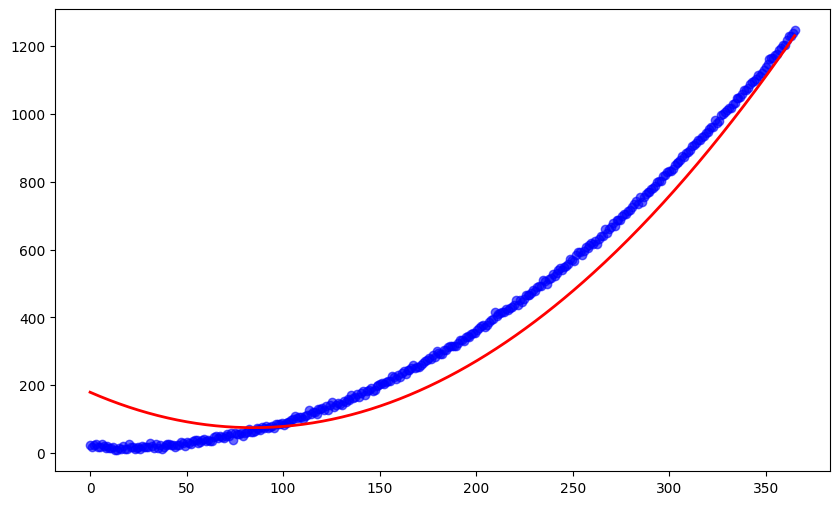

In [15]:
n = len(y)

# Gradient Descent Loop
cost_history = []
for i in range(iterations):
    # Predicted values
    y_pred = a * x_normalized**2 + b * x_normalized + c
    error = y - y_pred

    # Compute gradients
    a_gradient = (-2 / n) * np.sum(x_normalized**2 * error) + 2 * lambda_reg * a
    b_gradient = (-2 / n) * np.sum(x_normalized * error) + 2 * lambda_reg * b
    c_gradient = (-2 / n) * np.sum(error) + 2 * lambda_reg * c

    # Update parameters
    a -= learning_rate * a_gradient
    b -= learning_rate * b_gradient
    c -= learning_rate * c_gradient

    # Compute cost
    cost = np.mean(error**2) + lambda_reg * (a**2 + b**2 + c**2)
    cost_history.append(cost)

    # Print progress every 1000 iterations
    if i % 1000 == 0:
        print(f"Iteration {i}, Cost: {cost}")

# Final parameters
print(f"Final parameters: a={a:.4f}, b={b:.4f}, c={c:.4f}")

# Generate predictions using the final model
y_final_pred = a * x_normalized**2 + b * x_normalized + c

# Plot the data and the model
plt.figure(figsize=(10, 6))

# Plot actual data
plt.scatter(x, y, label='Actual Data', alpha=0.6, color='blue')

# Plot predicted quadratic fit
plt.plot(x, y_final_pred, label='Quadratic Fit', color='red', linewidth=2)
